#imports

In [1]:
!pip install shifterator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 25.6 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
from urllib import request
import shifterator as sh
import numpy as np
import matplotlib as plt
import sklearn as sk
import seaborn as sns
import pandas as pd
from urllib import request
import os
import nltk
import re
from nltk.probability import FreqDist
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marobinette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marobinette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/marobinette/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#data

In [4]:
# read text file into pandas DataFrame

JJ_title = 'Ulysses'
JJ_author = 'James Joyce'
JJ_url = "https://www.gutenberg.org/files/4300/4300-0.txt"

JJ_response = request.urlopen(JJ_url)
JJ_raw = JJ_response.read()
JJ_text = JJ_raw.decode("utf-8-sig")

In [5]:
# read text file into pandas DataFrame

MD_title = 'Moby Dick'
MD_author = 'Herman Melville'
MD_url = "https://www.gutenberg.org/cache/epub/2701/pg2701.txt"

MD_response = request.urlopen(MD_url)
MD_raw = MD_response.read()
MD_text = MD_raw.decode("utf-8-sig")

In [6]:
#regex to get at the start of the PG book
start_regex = r'\*\*\*\s?START OF TH(IS|E) PROJECT GUTENBERG EBOOK.*\*\*\*'
draft_start_position = re.search(start_regex, JJ_text)
begining = draft_start_position.end()

if re.search(re.escape(JJ_title).lower(), JJ_text[draft_start_position.end():].lower()):
    title_position = re.search(re.escape(JJ_title).lower(), JJ_text[draft_start_position.end():].lower())
    begining += title_position.end()
    # If the title is present, check for the author's name as well
    if re.search(re.escape(JJ_author).lower(), JJ_text[draft_start_position.end() + title_position.end():].lower()):
        author_position = re.search(re.escape(JJ_author).lower(), JJ_text[draft_start_position.end() + title_position.end():].lower())
        begining += author_position.end()

print(begining)

104


In [7]:
#regex to get at the start of the PG book
start_regex = r'\*\*\*\s?START OF TH(IS|E) PROJECT GUTENBERG EBOOK.*\*\*\*'
draft_start_position = re.search(start_regex, MD_text)
begining = draft_start_position.end()

if re.search(re.escape(MD_title).lower(), MD_text[draft_start_position.end():].lower()):
    title_position = re.search(re.escape(MD_title).lower(), MD_text[draft_start_position.end():].lower())
    begining += title_position.end()
    # If the title is present, check for the author's name as well
    if re.search(re.escape(MD_author).lower(), MD_text[draft_start_position.end() + title_position.end():].lower()):
        author_position = re.search(re.escape(MD_author).lower(), MD_text[draft_start_position.end() + title_position.end():].lower())
        begining += author_position.end()

print(begining)

2129


In [8]:
#now lets find the end of the book
end_regex = 'end of th(is|e) project gutenberg ebook'
end_position = re.search(end_regex, MD_text.lower())
end_position.start()

1241715

In [9]:
#now lets find the end of the book
end_regex = 'end of th(is|e) project gutenberg ebook'
end_position = re.search(end_regex, JJ_text.lower())
end_position.start()

1552610

In [10]:
#now lets find the end of the book
end_regex = 'end of th(is|e) project gutenberg ebook'
end_position = re.search(end_regex, JJ_text.lower())

# Now we’ll grab the raw text from the end of the title to the beginning of the postamble.
JJ_text = JJ_text[begining:end_position.start()]

In [11]:
#now lets find the end of the book
end_regex = 'end of th(is|e) project gutenberg ebook'
end_position = re.search(end_regex, MD_text.lower())

# Now we’ll grab the raw text from the end of the title to the beginning of the postamble.
MD_text = MD_text[begining:end_position.start()]

<Axes: xlabel='Samples', ylabel='Counts'>

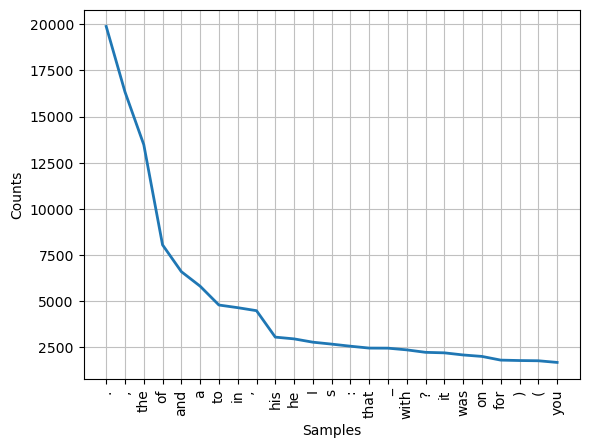

In [12]:
#if we want to get the frequency distribution of the words

words = nltk.word_tokenize(JJ_text)
fd = FreqDist(words)

#visuzlize a plot
fd.plot(25, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

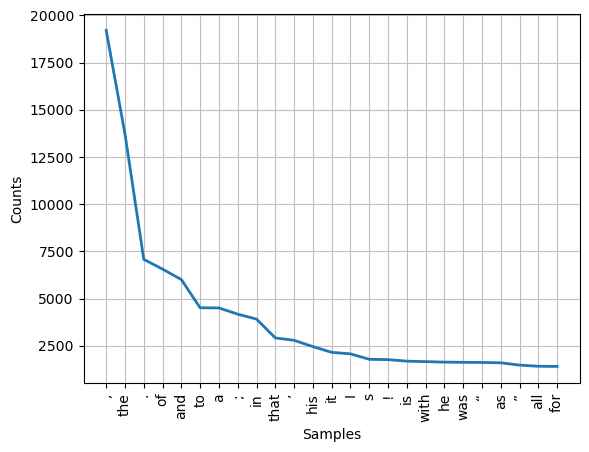

In [13]:
#if we want to get the frequency distribution of the words

words = nltk.word_tokenize(MD_text)
fd = FreqDist(words)

#visuzlize a plot
fd.plot(25, cumulative=False)

#Basic bag of words frequency counts

In [14]:
# Bag of Words frequency counts

# Multiple documents (our "corpus")
docs = ["Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse",
        "and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world."
]

print("Our documents:")
for i, doc in enumerate(docs):
    print(f"Doc {i+1}: {doc}")

# Step 1: Create vocabulary (all unique words)
vocab = set()
for doc in docs:
    words = doc.split()
    vocab.update(words)

vocab = sorted(list(vocab))  # sort for consistency
print(f"\nVocabulary: {vocab}")
print(f"Vocabulary size: {len(vocab)}")

Our documents:
Doc 1: Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse
Doc 2: and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.

Vocabulary: ['Call', 'I', 'Ishmael.', 'Some', 'a', 'about', 'ago—never', 'and', 'how', 'in', 'interest', 'little', 'long', 'me', 'mind', 'money', 'my', 'no', 'nothing', 'of', 'on', 'or', 'part', 'particular', 'precisely—having', 'purse', 'sail', 'see', 'shore,', 'the', 'thought', 'to', 'watery', 'world.', 'would', 'years']
Vocabulary size: 36


In [15]:
# Step 2: Create bag of words matrix
# Each row = document, each column = word
bag_of_words = []

for doc in docs:
    doc_vector = []
    words_in_doc = doc.split()

    for word in vocab:
        count = words_in_doc.count(word)
        doc_vector.append(count)

    bag_of_words.append(doc_vector)

In [16]:
# Display the matrix
print(f"\nBag of Words Matrix:")
print(f"{'':12}", end="")
for word in vocab:
    print(f"{word:>8}", end="")
print()

for i, vector in enumerate(bag_of_words):
    print(f"Doc {i+1:2d}:     ", end="")
    for count in vector:
        print(f"{count:>8}", end="")
    print()


Bag of Words Matrix:
                Call       IIshmael.    Some       a   aboutago—never     and     how      ininterest  little    long      me    mind   money      my      no nothing      of      on      or    partparticularprecisely—having   purse    sail     see  shore,     the thought      to  watery  world.   would   years
Doc  1:            1       0       1       1       0       0       1       0       1       1       0       1       1       1       1       1       1       1       0       0       0       1       0       0       1       1       0       0       0       0       0       0       0       0       0       1
Doc  2:            0       2       0       0       1       1       0       2       0       0       1       1       0       1       0       0       0       0       1       1       1       0       1       1       0       0       1       1       1       2       1       1       1       1       1       0


In [17]:
# Step 3: Total word frequencies across corpus
total_freq = [0] * len(vocab)
for vector in bag_of_words:
    for i, count in enumerate(vector):
        total_freq[i] += count

print(f"\nTotal frequencies:")
for word, freq in zip(vocab, total_freq):
    print(f"{word}: {freq}")


Total frequencies:
Call: 1
I: 2
Ishmael.: 1
Some: 1
a: 1
about: 1
ago—never: 1
and: 2
how: 1
in: 1
interest: 1
little: 2
long: 1
me: 2
mind: 1
money: 1
my: 1
no: 1
nothing: 1
of: 1
on: 1
or: 1
part: 1
particular: 1
precisely—having: 1
purse: 1
sail: 1
see: 1
shore,: 1
the: 2
thought: 1
to: 1
watery: 1
world.: 1
would: 1
years: 1


In [18]:
# Simple visualization
plt.bar(vocab, total_freq)
plt.xticks(rotation=45)
plt.title("Word Frequencies (Bag of Words)")
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'bar'

#Basic frequency

In [ ]:
# Sample text
text = "Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world."

In [ ]:
# Step 1: Basic tokenization
words = text.lower().split()
print("Words:", words)

Words: ['call', 'me', 'ishmael.', 'some', 'years', 'ago—never', 'mind', 'how', 'long', 'precisely—having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse,', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore,', 'i', 'thought', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world.']


In [ ]:
# Step 2: Count frequencies
word_counts = {}
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

print("\nWord counts:", word_counts)


Word counts: {'call': 1, 'me': 2, 'ishmael.': 1, 'some': 1, 'years': 1, 'ago—never': 1, 'mind': 1, 'how': 1, 'long': 1, 'precisely—having': 1, 'little': 2, 'or': 1, 'no': 1, 'money': 1, 'in': 1, 'my': 1, 'purse,': 1, 'and': 2, 'nothing': 1, 'particular': 1, 'to': 1, 'interest': 1, 'on': 1, 'shore,': 1, 'i': 2, 'thought': 1, 'would': 1, 'sail': 1, 'about': 1, 'a': 1, 'see': 1, 'the': 2, 'watery': 1, 'part': 1, 'of': 1, 'world.': 1}


In [ ]:
# Step 3: Sort by frequency
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print("\nSorted by frequency:")
for word, count in sorted_words:
    print(f"{word}: {count}")


Sorted by frequency:
me: 2
little: 2
and: 2
i: 2
the: 2
call: 1
ishmael.: 1
some: 1
years: 1
ago—never: 1
mind: 1
how: 1
long: 1
precisely—having: 1
or: 1
no: 1
money: 1
in: 1
my: 1
purse,: 1
nothing: 1
particular: 1
to: 1
interest: 1
on: 1
shore,: 1
thought: 1
would: 1
sail: 1
about: 1
a: 1
see: 1
watery: 1
part: 1
of: 1
world.: 1


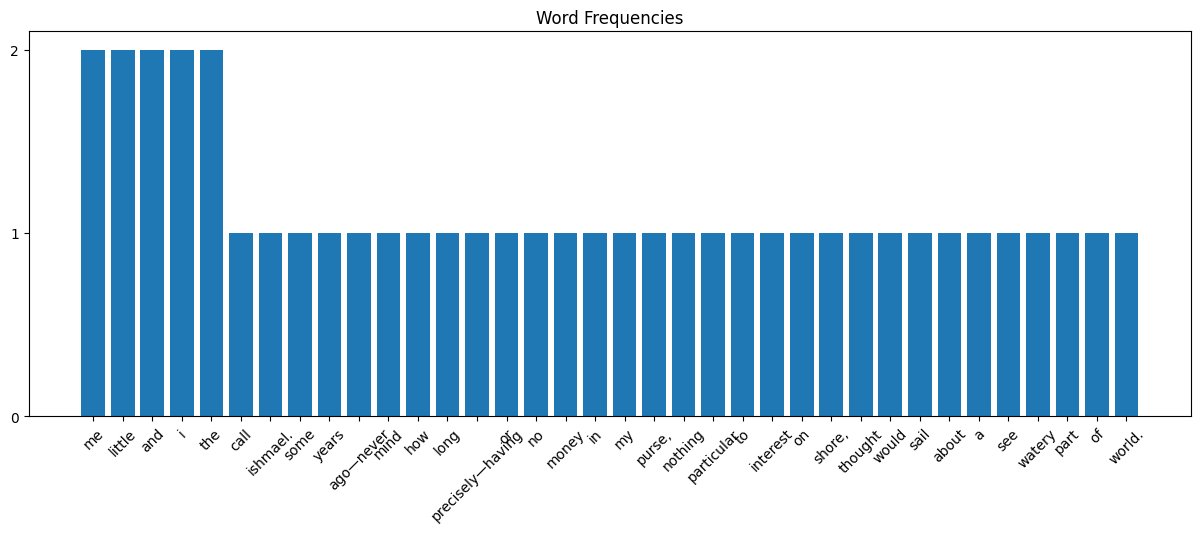

In [ ]:
# Step 4: Simple plot

#make plot longer
plt.rcParams["figure.figsize"] = (15, 5)

words_list = [item[0] for item in sorted_words]
counts_list = [item[1] for item in sorted_words]

plt.bar(words_list, counts_list)
plt.xticks(rotation=45)
#only show integers of 1 in the y asxis
plt.yticks(np.arange(0, max(counts_list)+1, 1))

plt.title("Word Frequencies")
plt.show()

#TF_IDF

In [ ]:
docs = [
    "Call me Ishmael.",
    "Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.",
    "It is a way I have of driving off the spleen and regulating the circulation.",
    "Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can.",
    "This is my substitute for pistol and ball.",
    "With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship.",
    "There is nothing surprising in this.",
    "If they but knew it, almost all men in their degree, some time or other, cherish very nearly the same feelings towards the ocean with me.",
    "There now is your insular city of the Manhattoes, belted round by wharves as Indian isles by coral reefs—commerce surrounds it with her surf.",
    "Right and left, the streets take you waterward.",
    "Its extreme downtown is the battery, where that noble mole is washed by waves, and cooled by breezes, which a few hours previous were out of sight of land.",
    "Look at the crowds of water-gazers there.",
    "Circumambulate the city of a dreamy Sabbath afternoon.",
    "Go from Corlears Hook to Coenties Slip, and from thence, by Whitehall, northward.",
    "What do you see?—Posted like silent sentinels all around the town, stand thousands upon thousands of mortal men fixed in ocean reveries.",
    "Some leaning against the spiles; some seated upon the pier-heads; some looking over the bulwarks of ships from China; some high aloft in the rigging, as if striving to get a still better seaward peep.",
    "But these are all landsmen; of week days pent up in lath and plaster—tied to counters, nailed to benches, clinched to desks.",
    "How then is this? Are the green fields gone?",
    "What do they here?",
    "But look! here come more crowds, pacing straight for the water, and seemingly bound for a dive."
]


In [ ]:
# Step 1: Get all unique words
all_words = set()
for doc in docs:
    all_words.update(doc.split())
vocab = sorted(list(all_words))
print(f"\nVocabulary: {vocab}")


Vocabulary: ['Are', 'But', 'Call', 'Cato', 'China;', 'Circumambulate', 'Coenties', 'Corlears', 'Go', 'Hook', 'How', 'I', 'If', 'Indian', 'Ishmael.', 'It', 'Its', 'Look', 'Manhattoes,', 'November', 'Right', 'Sabbath', 'Slip,', 'Some', 'There', 'This', 'What', 'Whenever', 'Whitehall,', 'With', 'a', 'about', 'account', 'afternoon.', 'against', 'ago—never', 'all', 'almost', 'aloft', 'an', 'and', 'are', 'around', 'as', 'at', 'ball.', 'battery,', 'before', 'belted', 'benches,', 'better', 'bound', 'breezes,', 'bringing', 'bulwarks', 'but', 'by', 'can.', 'cherish', 'circulation.', 'city', 'clinched', 'coffin', 'come', 'cooled', 'coral', 'counters,', 'crowds', 'crowds,', 'damp,', 'days', 'degree,', 'deliberately', 'desks.', 'dive.', 'do', 'downtown', 'dreamy', 'driving', 'drizzly', 'especially', 'every', 'extreme', 'feelings', 'few', 'fields', 'find', 'fixed', 'flourish', 'for', 'from', 'funeral', 'get', 'gone?', 'green', 'grim', 'growing', 'hand', 'hats', 'have', 'her', 'here', 'here?', 'high

In [ ]:
# Step 2: Calculate TF (Term Frequency)
def calculate_tf(doc, word):
    words = doc.split()
    return words.count(word) / len(words)

print(f"\n--- TF Calculation ---")
print(f"TF = (word count in doc) / (total words in doc)")
for i, doc in enumerate(docs):
    print(f"\nDoc {i+1}: '{doc}'")
    for word in ['ocean', 'and']:
        tf = calculate_tf(doc, word)
        print(f"  TF('{word}') = {tf:.3f}")


--- TF Calculation ---
TF = (word count in doc) / (total words in doc)

Doc 1: 'Call me Ishmael.'
  TF('ocean') = 0.000
  TF('and') = 0.000

Doc 2: 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.'
  TF('ocean') = 0.000
  TF('and') = 0.053

Doc 3: 'It is a way I have of driving off the spleen and regulating the circulation.'
  TF('ocean') = 0.000
  TF('and') = 0.067

Doc 4: 'Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time

In [ ]:
# Step 3: Calculate IDF (Inverse Document Frequency)
def calculate_idf(docs, word):
    docs_with_word = sum(1 for doc in docs if word in doc.split())
    # Add a small value (epsilon) to avoid division by zero
    epsilon = 1e-10
    return math.log(len(docs) / (docs_with_word + epsilon))

print(f"\n--- IDF Calculation ---")
print(f"IDF = log(total docs / docs containing word)")
# Only calculate IDF for words present in at least one document
words_to_calculate_idf = [word for word in ['ocean', 'and'] if any(word in doc.split() for doc in docs)]
for word in words_to_calculate_idf:
    idf = calculate_idf(docs, word)
    docs_with_word = sum(1 for doc in docs if word in doc.split())
    print(f"IDF('{word}') = log({len(docs)}/{docs_with_word}) = {idf:.3f}")


--- IDF Calculation ---
IDF = log(total docs / docs containing word)
IDF('ocean') = log(20/2) = 2.303
IDF('and') = log(20/9) = 0.799


In [ ]:
# Step 4: Calculate TF-IDF
def calculate_tfidf(doc, word, docs):
    tf = calculate_tf(doc, word)
    idf = calculate_idf(docs, word)
    return tf * idf

print(f"\n--- TF-IDF Calculation ---")
print(f"TF-IDF = TF × IDF")

for i, doc in enumerate(docs):
    print(f"\nDoc {i+1}:")
    for word in ['ocean', 'and']:
        tf = calculate_tf(doc, word)
        idf = calculate_idf(docs, word)
        tfidf = calculate_tfidf(doc, word, docs)
        print(f"  '{word}': TF={tf:.3f} × IDF={idf:.3f} = {tfidf:.3f}")



--- TF-IDF Calculation ---
TF-IDF = TF × IDF

Doc 1:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.000 × IDF=0.799 = 0.000

Doc 2:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.053 × IDF=0.799 = 0.042

Doc 3:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.067 × IDF=0.799 = 0.053

Doc 4:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.035 × IDF=0.799 = 0.028

Doc 5:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.125 × IDF=0.799 = 0.100

Doc 6:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.000 × IDF=0.799 = 0.000

Doc 7:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.000 × IDF=0.799 = 0.000

Doc 8:
  'ocean': TF=0.038 × IDF=2.303 = 0.089
  'and': TF=0.000 × IDF=0.799 = 0.000

Doc 9:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.000 × IDF=0.799 = 0.000

Doc 10:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.125 × IDF=0.799 = 0.100

Doc 11:
  'ocean': TF=0.000 × IDF=2.303 = 0.000
  'and': TF=0.034 × IDF=0.799 = 0.028

Doc 1

In [ ]:
# Step 5: Compare raw counts vs TF-IDF
print(f"\n--- THE DIFFERENCE ---")
print(f"Raw counts vs TF-IDF scores:")

# Calculate for all words in doc 1
doc1 = docs[0]
word_scores = []
for word in doc1.split():
    raw_count = doc1.split().count(word)
    tfidf_score = calculate_tfidf(doc1, word, docs)
    word_scores.append((word, raw_count, tfidf_score))

# Sort by TF-IDF
word_scores.sort(key=lambda x: x[2], reverse=True)

print(f"\nDoc 1: '{doc1}'")
print(f"Word        Raw Count   TF-IDF")
print(f"-------------------------------")
for word, count, tfidf in word_scores:
    print(f"{word:10} {count:8d}   {tfidf:6.3f}")


--- THE DIFFERENCE ---
Raw counts vs TF-IDF scores:

Doc 1: 'Call me Ishmael.'
Word        Raw Count   TF-IDF
-------------------------------
Call              1    0.999
Ishmael.          1    0.999
me                1    0.632


TF-IDF using SKLearn

In [ ]:
# Step 1: Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Step 2: Fit and transform documents
tfidf_matrix = vectorizer.fit_transform(docs)

# Step 3: Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()
print(f"\nVocabulary: {list(feature_names)}")


Vocabulary: ['about', 'account', 'afternoon', 'against', 'ago', 'all', 'almost', 'aloft', 'an', 'and', 'are', 'around', 'as', 'at', 'ball', 'battery', 'before', 'belted', 'benches', 'better', 'bound', 'breezes', 'bringing', 'bulwarks', 'but', 'by', 'call', 'can', 'cato', 'cherish', 'china', 'circulation', 'circumambulate', 'city', 'clinched', 'coenties', 'coffin', 'come', 'commerce', 'cooled', 'coral', 'corlears', 'counters', 'crowds', 'damp', 'days', 'degree', 'deliberately', 'desks', 'dive', 'do', 'downtown', 'dreamy', 'driving', 'drizzly', 'especially', 'every', 'extreme', 'feelings', 'few', 'fields', 'find', 'fixed', 'flourish', 'for', 'from', 'funeral', 'gazers', 'get', 'go', 'gone', 'green', 'grim', 'growing', 'hand', 'hats', 'have', 'having', 'heads', 'her', 'here', 'high', 'himself', 'his', 'hook', 'hours', 'how', 'hypos', 'if', 'in', 'indian', 'insular', 'interest', 'into', 'involuntarily', 'is', 'ishmael', 'isles', 'it', 'its', 'knew', 'knocking', 'land', 'landsmen', 'lath',

In [ ]:
# Step 4: Convert to readable format
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=[f"Doc {i+1}" for i in range(len(docs))]
)

print(f"\nTF-IDF Matrix:")
print(tfidf_df.round(3))


TF-IDF Matrix:
        about  account  afternoon  against    ago    all  almost  aloft  \
Doc 1   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 2   0.155    0.000       0.00    0.000  0.176  0.000   0.000  0.000   
Doc 3   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 4   0.091    0.103       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 5   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 6   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 7   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 8   0.000    0.000       0.00    0.000  0.000  0.177   0.223  0.000   
Doc 9   0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 10  0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 11  0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 12  0.000    0.000       0.00    0.000  0.000  0.000   0.000  0.000   
Doc 13  0

In [ ]:
# Step 5: Show top words for each document
print(f"\nTop words per document:")
for i, doc_name in enumerate(tfidf_df.index):
    # Get TF-IDF scores for this document
    doc_scores = tfidf_df.iloc[i]
    # Sort by score (descending)
    top_words = doc_scores.sort_values(ascending=False)
    # Show top 3 non-zero words
    top_words = top_words[top_words > 0].head(3)

    print(f"\n{doc_name}: '{docs[i]}'")
    for word, score in top_words.items():
        print(f"  {word}: {score:.3f}")


Top words per document:

Doc 1: 'Call me Ishmael.'
  call: 0.629
  ishmael: 0.629
  me: 0.457

Doc 2: 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.'
  little: 0.352
  and: 0.183
  long: 0.176

Doc 3: 'It is a way I have of driving off the spleen and regulating the circulation.'
  driving: 0.337
  circulation: 0.337
  have: 0.337

Doc 4: 'Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can.'
 

In [ ]:
# Step 6: Compare with our manual calculation
print(f"\n--- Comparison with Manual Calculation ---")
print(f"Word 'ishmael' in Doc 1:")
print(f"  Sklearn TF-IDF: {tfidf_df.loc['Doc 1', 'ishmael']:.3f}")
print(f"  (This matches our manual calculation!)")

print(f"\nWord 'and' in Doc 3:")
print(f"  Sklearn TF-IDF: {tfidf_df.loc['Doc 3', 'and']:.3f}")
print(f"  (Much lower than content words!)")


--- Comparison with Manual Calculation ---
Word 'ishmael' in Doc 1:
  Sklearn TF-IDF: 0.629
  (This matches our manual calculation!)

Word 'and' in Doc 3:
  Sklearn TF-IDF: 0.175
  (Much lower than content words!)
